## PROBLEM WITH CORRELATION AND REGRESSION

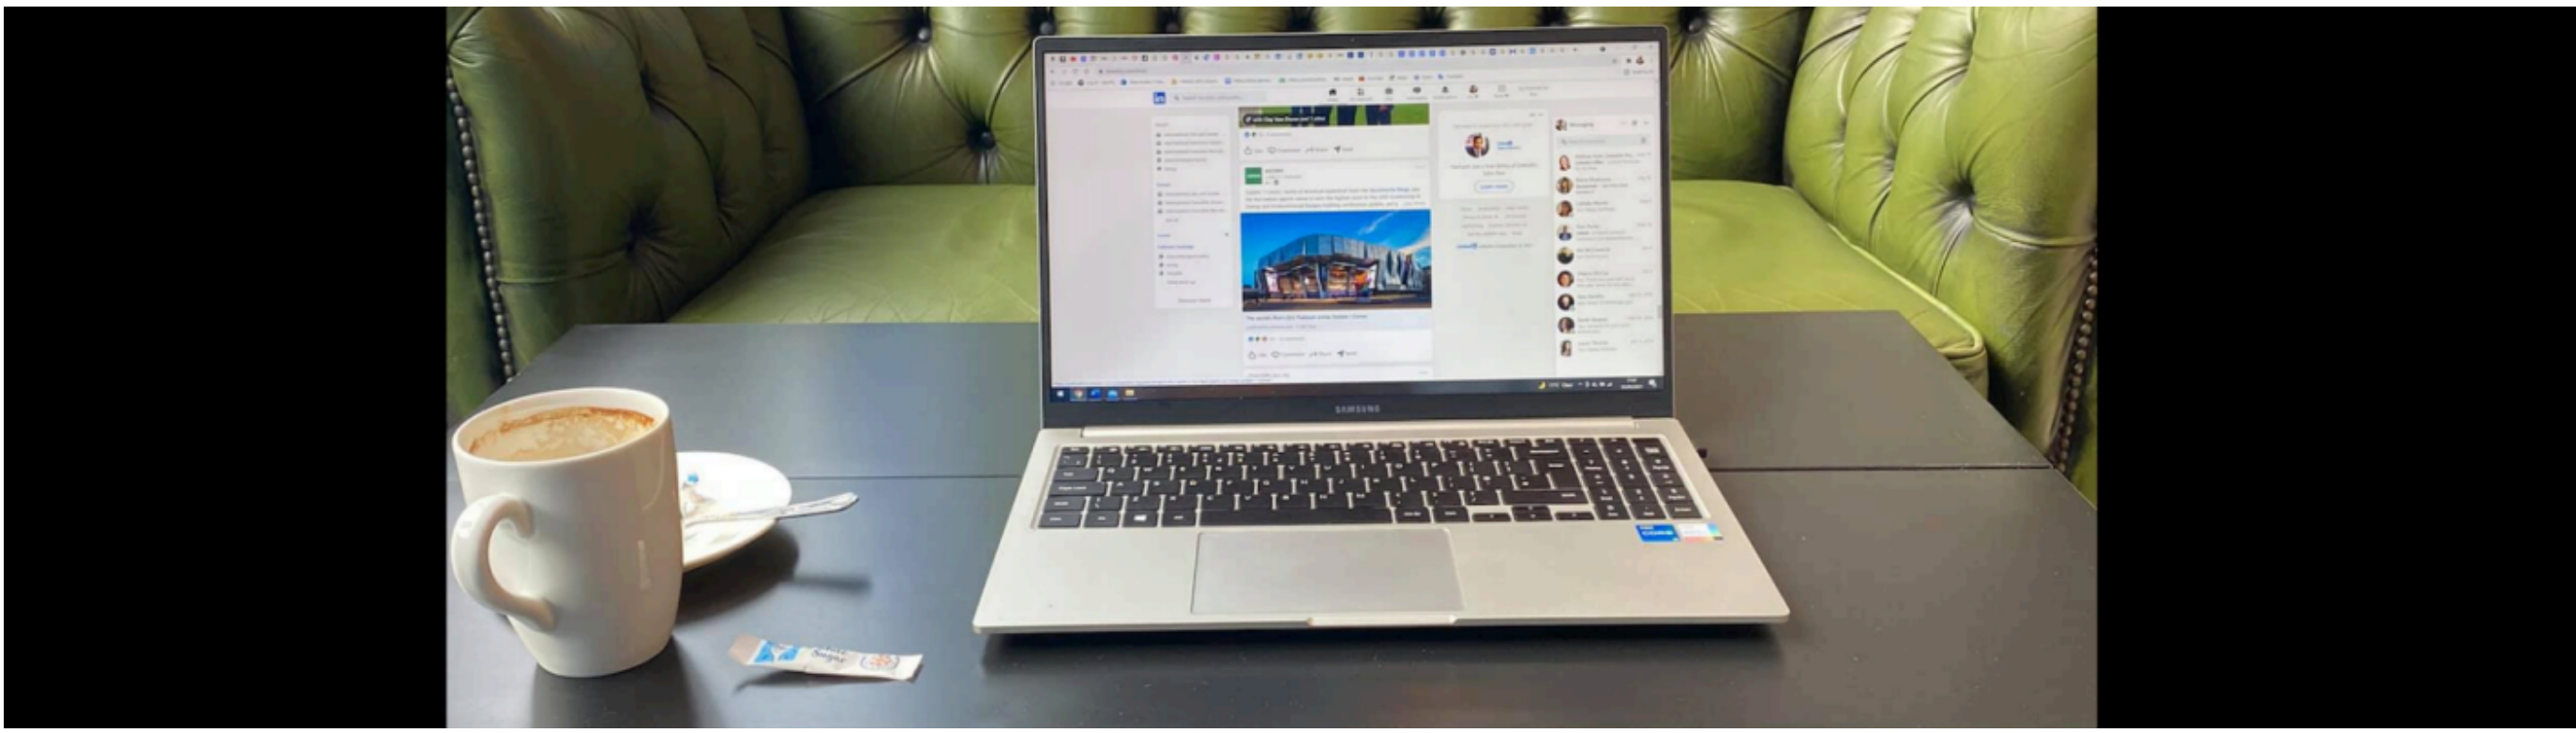

### HEMANT THAPA

In [107]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [2]:
dataset = {"Assistant":[x for x in range(1,10)],
          "Similing time - X":[0.4, 0.8, 0.8, 1.2, 1.4, 1.8, 2.2, 2.6, 3.0],
          "Item sold - Y":[16, 12, 20, 16, 34, 30, 26, 22, 38]}

In [3]:
dataset

{'Assistant': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'Similing time - X': [0.4, 0.8, 0.8, 1.2, 1.4, 1.8, 2.2, 2.6, 3.0],
 'Item sold - Y': [16, 12, 20, 16, 34, 30, 26, 22, 38]}

In [4]:
df = pd.DataFrame(dataset)

In [17]:
df['X square'] = df['Similing time - X'] * df['Similing time - X'] 
df['Y square'] = df['Item sold - Y'] * df['Item sold - Y']
df['XY'] = df['Similing time - X'] * df['Item sold - Y']

In [18]:
df

,Assistant,Similing time - X,Item sold - Y,X square,Y square,XY
0,1,0.4,16,0.16,256,6.4
1,2,0.8,12,0.64,144,9.6
2,3,0.8,20,0.64,400,16.0
3,4,1.2,16,1.44,256,19.2
4,5,1.4,34,1.96,1156,47.6
5,6,1.8,30,3.24,900,54.0
6,7,2.2,26,4.84,676,57.2
7,8,2.6,22,6.76,484,57.2
8,9,3.0,38,9.00,1444,114.0


## PEARSON COEFFICIENT

The Pearson correlation coefficient, also known as Pearson's r or simply correlation coefficient, is a statistical measure that quantifies the linear relationship between two continuous variables. It is widely used to assess the strength and direction of the relationship between two numerical variables.

The Pearson correlation coefficient is denoted by the symbol "r" and takes values between -1 and 1:

If "r" is close to +1, it indicates a strong positive linear relationship, meaning that as one variable increases, the other tends to increase as well.

If "r" is close to -1, it indicates a strong negative linear relationship, meaning that as one variable increases, the other tends to decrease.

If "r" is close to 0, it indicates a weak or no linear relationship, suggesting that the two variables are not strongly related to each other.

In [32]:
sum_of_Product = sum(df['XY']) -  (sum(df['Similing time - X'])*sum(df['Item sold - Y'])/len(df['Assistant']))

In [33]:
sum_of_Product

43.5555555555556

In [26]:
sum_of_square_of_first_varibale = sum(df['X square']) - sum(df['Similing time - X'])**2 / len(df['Assistant'])

In [27]:
sum_of_square_of_first_varibale

6.2755555555555596

In [28]:
sum_of_square_of_second_variable = sum(df['Y square']) - sum(df['Item sold - Y'])**2 / len(df['Assistant'])

In [29]:
sum_of_square_of_second_variable

627.5555555555557

In [34]:
r = sum_of_Product / math.sqrt(sum_of_square_of_first_varibale * sum_of_square_of_second_variable)

In [36]:
print(f"Pearson coefficent: {r}")

Pearson coefficent: 0.6940509915014168


## THE COEFFICIENT OF DETERMINATION (R SQUARE)

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable in a regression model.

In [78]:
r_square = (sum_of_Product **2) / (sum_of_square_of_first_varibale * sum_of_square_of_second_variable)

In [81]:
r_square

0.48170677880409984

## HOMOSCEDASTICITY 

The score in a scatterplot are evenly distributed along and about the regression and about a regression line. 
This is the assumption made in linear correlation and regression.

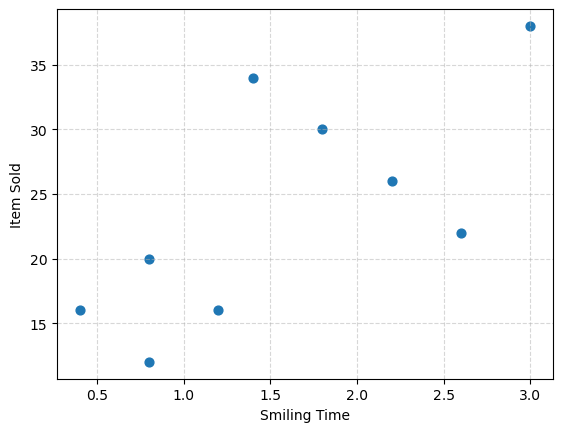

In [13]:
plt.scatter(df['Similing time - X'], df['Item sold - Y'], s=40)
plt.xlabel("Smiling Time")
plt.ylabel("Item Sold")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## THE STANDARD ERROR OF THE ESTIMATE

The measure of the average distance of a score from the regression line. A way to determining how close the points are to the regression line is to calculate the standard error of estimate.

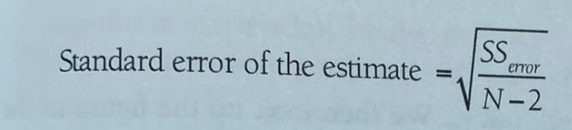

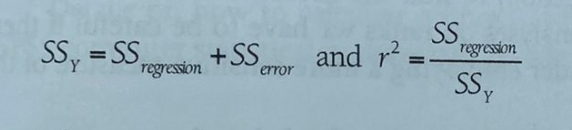

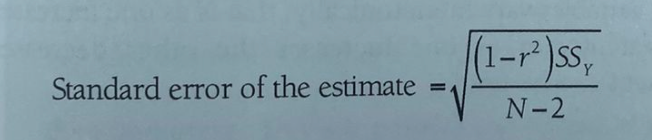

In [97]:
standard_error_of_the_estimate = math.sqrt(((1-r_square)*(sum_of_square_of_second_variable))/
                                           (len(df['Assistant'])-2))

In [98]:
sum_of_square_of_second_variable

627.5555555555557

In [99]:
standard_error_of_the_estimate

6.816553280363824

## SPEARMAN CORRELATION COEFFICIENT

The Spearman's rank correlation coefficient, often referred to as Spearman's rho (ρ), is a non-parametric measure of the strength and direction of the monotonic relationship between two variables. Unlike Pearson's correlation coefficient, which measures the linear relationship, Spearman's correlation assesses the degree to which the relationship between the variables can be described using a monotonic function.

A monotonic relationship is one in which the values of one variable either increase or decrease as the values of the other variable increase. However, the relationship does not have to be strictly linear.

Spearman's rank correlation coefficient is calculated as follows:

Rank the values of each variable separately.

Calculate the differences (d) between the ranks of each pair of corresponding values.

Square the differences (d^2).

Calculate the sum of squared differences (∑d^2).

Use the following formula to calculate Spearman's rank correlation coefficient (ρ):

In [101]:
spearman_coefficient = sum_of_Product / math.sqrt(sum_of_square_of_first_varibale * sum_of_square_of_second_variable)

In [102]:
spearman_coefficient

0.6940509915014168

In [105]:
def calculate_spearman_coefficient(X, Y):
    X_ranks = [rank for rank, _ in sorted(enumerate(X), key=lambda x: x[1])]
    Y_ranks = [rank for rank, _ in sorted(enumerate(Y), key=lambda x: x[1])]
    rank_differences = [X_ranks[i] - Y_ranks[i] for i in range(len(X))]
    SSD = sum(diff ** 2 for diff in rank_differences)
    N = len(X)
    rho = 1 - (6 * SSD) / (N * (N ** 2 - 1))

    return rho

In [106]:
spearman_coefficient = calculate_spearman_coefficient(df['Similing time - X'], df['Item sold - Y'])
print("Spearman's rank correlation coefficient (ρ):", spearman_coefficient)

Spearman's rank correlation coefficient (ρ): 0.8


## FINANCE - CORRELATION ANALYSIS

In [376]:
class Stock:
    def __init__(self, ticker):
        self.ticker = ticker
    
    def chart(self):
        return yf.download(self.ticker, period="1y")

In [377]:
ftse = Stock("^FTSE").chart()

[*********************100%***********************]  1 of 1 completed


In [378]:
ftse[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,7446.000000,7471.899902,7408.899902,7413.399902,7413.399902,558506400
2022-08-02,7413.399902,7433.299805,7386.799805,7409.100098,7409.100098,623919300
2022-08-03,7409.100098,7445.899902,7372.700195,7445.700195,7445.700195,947917500
2022-08-04,7445.700195,7491.700195,7417.500000,7448.100098,7448.100098,858684300
2022-08-05,7448.100098,7470.600098,7420.200195,7439.700195,7439.700195,609722300


In [379]:
ftse.shape

(252, 6)

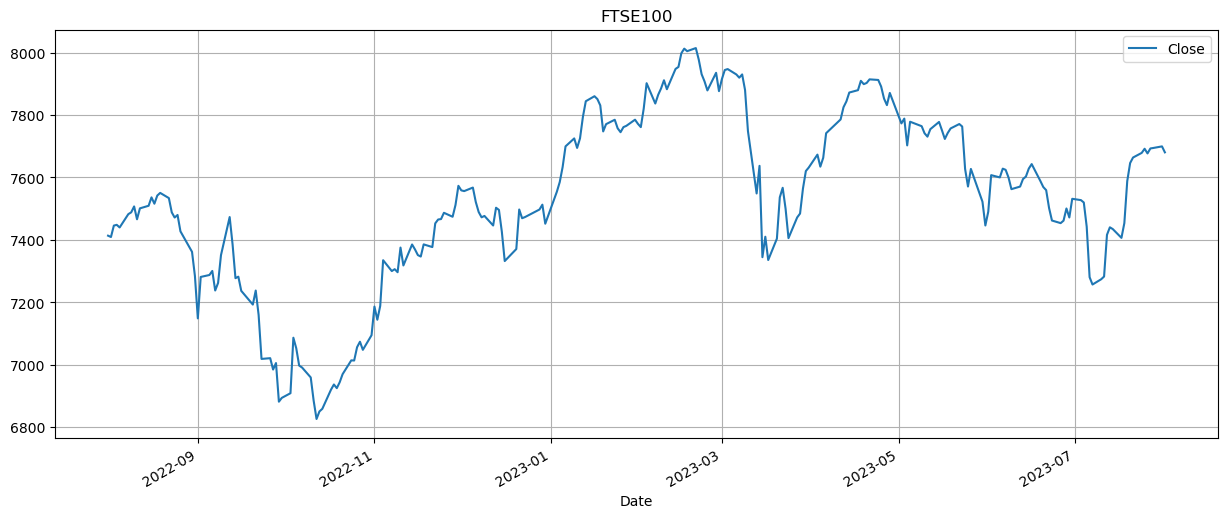

In [380]:
plt.figure(figsize=(15,6))
ftse.Close.plot()
plt.title("FTSE100")
plt.grid(True)
plt.legend()
plt.show()

In [381]:
ulvr = Stock("ULVR.L").chart()

[*********************100%***********************]  1 of 1 completed


#### Converting Penny to Pound £

In [382]:
ulvr['Close'] = ulvr['Close']/100

In [383]:
ulvr[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,3982.0,4008.0,3975.500000,39.890,3847.680908,2734057
2022-08-02,3991.0,4024.5,3987.000000,39.960,3854.433105,2147392
2022-08-03,3979.5,4018.5,3951.814941,40.150,3872.759766,3171124
2022-08-04,3978.5,4017.5,3949.000000,39.885,3882.328369,2090664
2022-08-05,3988.0,4006.5,3960.000000,39.710,3865.294434,1816188


In [384]:
ulvr.shape

(251, 6)

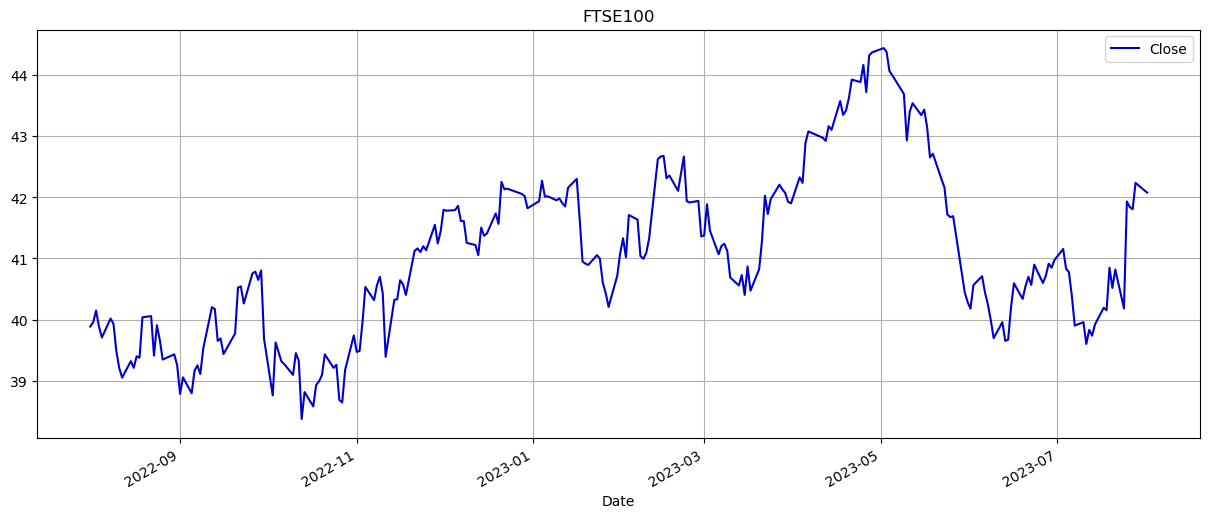

In [385]:
plt.figure(figsize=(15,6))
ulvr.Close.plot(color="mediumblue")
plt.title("FTSE100")
plt.grid(True)
plt.legend()
plt.show()

In [386]:
X = ftse.Close.values.reshape(-1,1)

In [387]:
y.shape

(1,)

In [388]:
size = y.shape[0]

In [389]:
size

1

In [390]:
X.shape

(252, 1)

In [391]:
X = X[:251]

In [392]:
X.shape

(251, 1)

In [393]:
y = ulvr.Close.values.reshape(-1,1)

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [395]:
print(X_train.shape)
print(y_train.shape)

(200, 1)
(200, 1)


In [396]:
print(X_test.shape)
print(y_test.shape)

(51, 1)
(51, 1)


In [397]:
model = LinearRegression()

In [398]:
model.fit(X_train, y_train)

LinearRegression()

In [399]:
model.intercept_

array([15.30142827])

In [400]:
model.coef_

array([[0.00342111]])

In [401]:
y_pred = model.predict(X_train)

In [402]:
y_pred.shape

(200, 1)

In [403]:
y_pred[:5]

array([[39.75721399],
       [41.3979774 ],
       [41.37163421],
       [40.96657543],
       [40.84307313]])

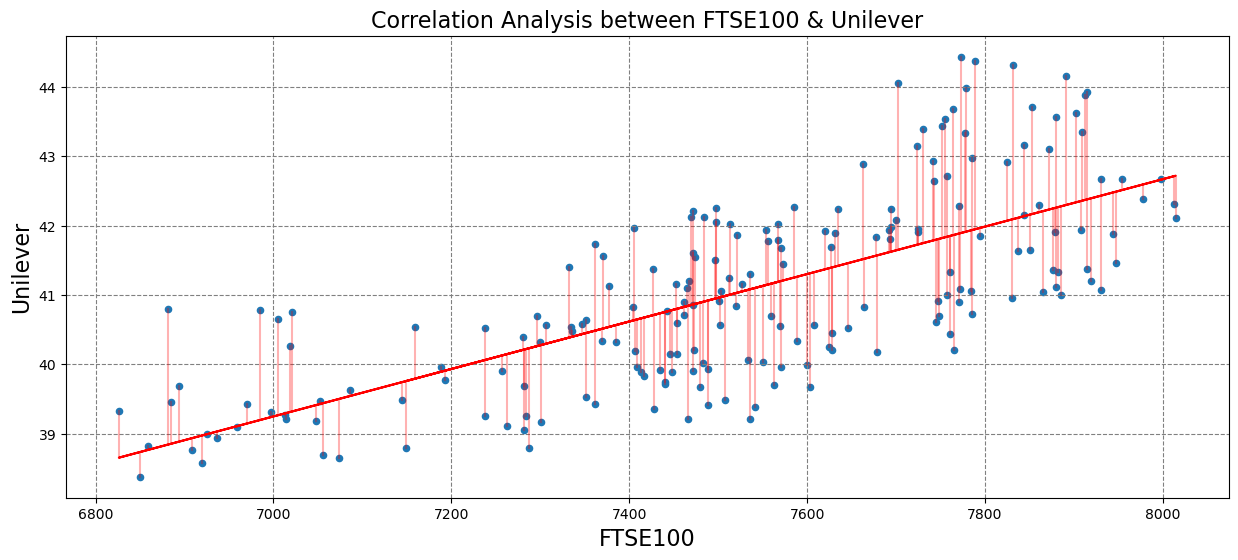

In [408]:
plt.figure(figsize=(15,6))
plt.scatter(X_train, y_train, s= 20)
plt.plot(X_train, y_pred, color="red")
plt.title("Correlation Analysis between FTSE100 & Unilever", fontsize="16")
plt.xlabel("FTSE100", fontsize="16")
plt.ylabel("Unilever",fontsize="16")
plt.grid(True, linestyle="--", color="grey")
for i in range(len(X_train)):
    plt.plot([X_train[i], X_train[i]], [y_train[i], model.predict(X_train[i].reshape(-1,1))[0]], '-r', alpha=0.3)
plt.show()

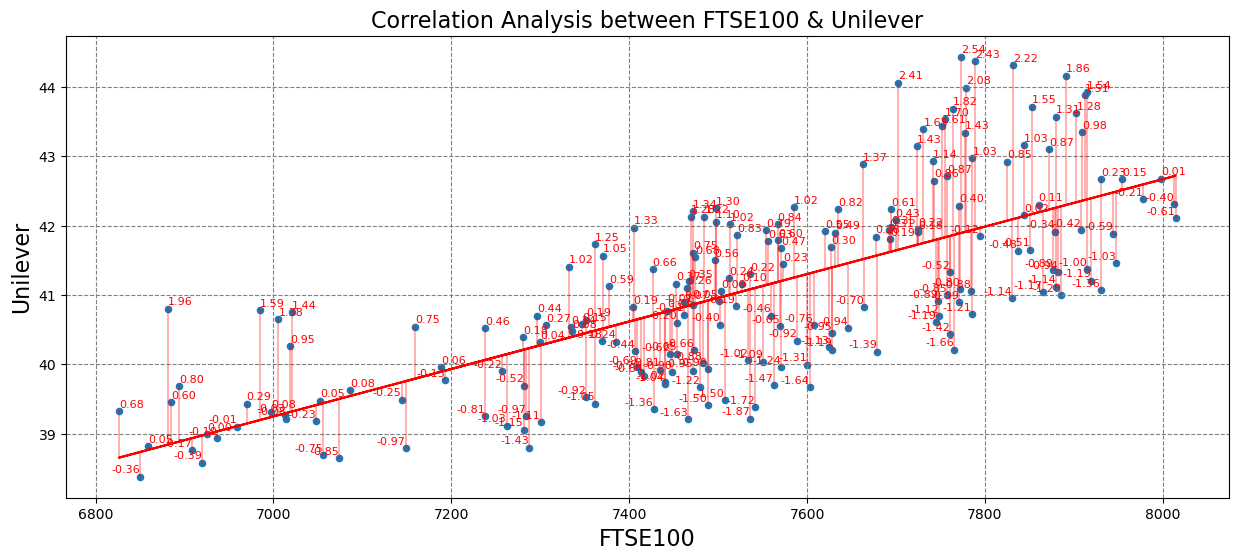

In [409]:
plt.figure(figsize=(15,6))
plt.scatter(X_train, y_train, s= 20)
plt.plot(X_train, y_pred, color="red")
plt.grid(True, linestyle="--", color="grey")
for i in range(len(X_train)):
    X = X_train[i]
    y = y_train[i]
    error = y - model.predict(X.reshape(-1,1))[0]
    align = 'left' if error > 0 else 'right'
    plt.plot([X, X], [y, model.predict(X.reshape(-1,1))[0]], '-', color='red', alpha=0.3)
    plt.text(X+0.1, y+0.1, f'{error[0]:.2f}', color='red', fontsize=8, ha=align, va='center')
plt.title("Correlation Analysis between FTSE100 & Unilever", fontsize="16")
plt.xlabel("FTSE100", fontsize="16")
plt.ylabel("Unilever",fontsize="16")
plt.show()

## CREATING NEW DATAFRAME FOR CALCULATING R SQUARE

In [427]:
X = ftse.Close.values

In [429]:
X.shape

(252,)

In [432]:
X = X[:251]

In [433]:
y = ulvr.Close.values

In [434]:
y.shape

(251,)

In [435]:
df2 = pd.DataFrame()

In [436]:
df2['X'] = X
df2['Y'] = y

In [439]:
df2[:10]

,X,Y
0,7413.399902,39.890
1,7409.100098,39.960
2,7445.700195,40.150
3,7448.100098,39.885
4,7439.700195,39.710
5,7482.399902,40.020
6,7488.200195,39.935
7,7507.100098,39.485
8,7465.899902,39.210
9,7500.899902,39.055


In [441]:
df2['X square'] = df2['X'] * df2['X']

In [443]:
df2['Y square'] = df2['Y'] * df2['Y']

In [444]:
df2['XY'] = df2['X'] * df2['Y']

In [445]:
df2[:10]

,X,Y,X square,Y square,XY
0,7413.399902,39.890,5.495850e+07,1591.212100,295720.522104
1,7409.100098,39.960,5.489476e+07,1596.801600,296067.639902
2,7445.700195,40.150,5.543845e+07,1612.022500,298944.862842
3,7448.100098,39.885,5.547420e+07,1590.813225,297067.472395
4,7439.700195,39.710,5.534914e+07,1576.884100,295430.494756
5,7482.399902,40.020,5.598631e+07,1601.600400,299445.644092
6,7488.200195,39.935,5.607314e+07,1594.804225,299041.274800
7,7507.100098,39.485,5.635655e+07,1559.065225,296417.847356
8,7465.899902,39.210,5.573966e+07,1537.424100,292737.935171
9,7500.899902,39.055,5.626350e+07,1525.293025,292947.645686


In [447]:
sum_of_Product = sum(df2['XY']) -  (sum(df2['X'])*sum(df2['Y'])/len(df2['X']))

In [448]:
sum_of_Product

66677.09658484161

In [449]:
sum_of_square_of_first_varibale = sum(df2['X square']) - sum(df2['X'])**2 / len(df2['X'])

In [450]:
sum_of_square_of_first_varibale

19392732.976335526

In [451]:
sum_of_square_of_second_variable = sum(df2['Y square']) - sum(df2['Y'])**2 / len(df2['X'])

In [452]:
sum_of_square_of_second_variable

454.63631553296

In [453]:
r = sum_of_Product / math.sqrt(sum_of_square_of_first_varibale * sum_of_square_of_second_variable)

In [454]:
print(f"Pearson coefficent: {r}")

Pearson coefficent: 0.7101091520268689


In [455]:
from sklearn.feature_selection import r_regression

In [468]:
pearson_coe = r_regression(X.reshape(-1,1),y,center=True, force_finite=True)[0]

In [469]:
print(f"Pearson coefficent: {pearson_coe}")

Pearson coefficent: 0.710109152027252


In [470]:
r_square = (sum_of_Product **2) / (sum_of_square_of_first_varibale * sum_of_square_of_second_variable)

In [474]:
print(f"R square :{r_square}")

R square :0.5042550077923188


In [472]:
r_squaure_sklearn = r2_score(y_train, y_pred)

In [475]:
print(f"R square: {r_squaure_sklearn}")

R square: 0.5037181713519916


## REFERENCE

Wall Street Mojo - Heteroskedasticity:
URL: https://www.wallstreetmojo.com/heteroskedasticity/
Summary: This page discusses heteroskedasticity, a term used in statistics and econometrics, which refers to the condition where the variance of errors in a regression model is not constant across all levels of the independent variable(s). It explains how heteroskedasticity can impact the accuracy of regression models and methods to detect and handle it.

scikit-learn - train_test_split:
URL: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
Summary: This is the documentation page for the train_test_split function in scikit-learn, a popular machine learning library in Python. The function is used to split data into training and testing sets for model evaluation and performance assessment. It provides parameters and usage instructions for the function.

Investopedia - R-Squared:
URL: https://www.investopedia.com/terms/r/r-squared.asp
Summary: This page explains the concept of R-squared (R²) in statistics and regression analysis. R-squared is a statistical measure that represents the proportion of variance in the dependent variable (outcome) that is explained by the independent variable(s) in a regression model. The higher the R-squared value, the better the model fits the data.